<a href="https://colab.research.google.com/github/Ryanzaufa/MachineLearningSC/blob/main/04_03_Fire_Ryanza_Aufa_Yansa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Library yang ingin digunakan
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm.autonotebook import tqdm

import numpy as np
from numpy.random import seed
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from warnings import filterwarnings as fw; fw("ignore")
%matplotlib inline

In [ ]:
#Hyperparameter
BATCH_SIZE = 100
EPOCH = 10
LEARNING_RATE = 0.001
N_CLASSES = 10
INPUT_SIZE = 784

In [ ]:
#Transformasi data gambar menjadi tensor
transform =  transforms.ToTensor()

In [ ]:
#Train dataset
train_dataset = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

#Test dataset
test_dataset = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ../Data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ../Data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
#Baca train data
images, labels = train_dataset[0]
images.shape

torch.Size([1, 28, 28])

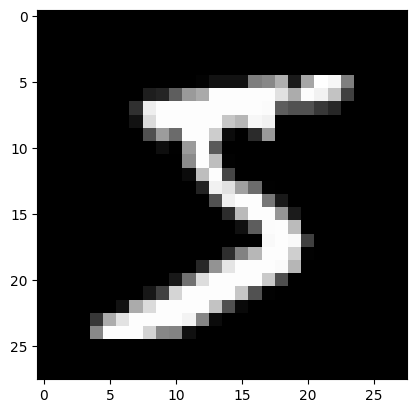

In [ ]:
#Menampilkan train data
plt.imshow(images.reshape((28,28)), cmap='gray')

In [ ]:
#Data loader
SEED = 0

seed(SEED)
torch.manual_seed(SEED)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
from torchvision.utils import make_grid

#Menampilkan gambar
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

#Batch pertama
for images,labels in train_loader:
  break

Labels:  [   6    8    8    7    8    0    0    5    6    0]


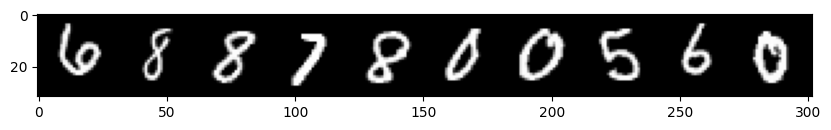

In [ ]:
#Menampilkan 10 label pertama
print("Labels: ", labels[:10].numpy())

#Menampilkan 10 gambar pertama
im = make_grid(images[:10], nrow=10)
plt.figure(figsize=(10,4))

#Transpose dengan mengubah gambar dar CWH ke WHC
plt.imshow(np.transpose(im.numpy(),(1,2,0)));

In [ ]:
#Model Neural Network
class MultilayerPerceptron(nn.Module):
  def __init__(self, input_size=INPUT_SIZE, num_classes=N_CLASSES, layers=[120, 84], *args, **kwargs) -> None:
    super().__init__()

    self.fc1 = nn.Linear(input_size, layers[0])
    self.fc2 = nn.Linear(layers[0], layers[1])
    self.fc3 = nn.Linear(layers[1], num_classes)

  #Forward
  def forward(self,X):
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)

In [ ]:
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
#Loss function Multiclass
loss_function = nn.CrossEntropyLoss()

#Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
images.view(100,-1).shape

torch.Size([100, 784])

In [ ]:
#Tracker
train_loss, train_correct = [], []
test_loss, test_correct = [], []

for i in range(EPOCH):
  trn_corr = 0
  tst_corr = 0

  #Training
  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1

    y_pred = model(X_train.view(BATCH_SIZE,-1))
    loss = loss_function(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    #Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%200 == 0 :
      acc = trn_corr.item()*100/(100*b)
      print(f"Epoch : {i}, batch: {b}, loss: {loss.item()}, accuracy: {acc}")

  train_loss.append(loss.detach().numpy())
  train_correct.append(trn_corr)

  #Testing/Validasi
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test.view(BATCH_SIZE,-1))
      predicted = torch.max(y_val.data, 1)[1]

      batch_corr = (predicted == y_test).sum()
      tst_corr += batch_corr

  loss = loss_function(y_val, y_test)
  test_loss.append(loss.detach().numpy())
  test_correct.append(tst_corr)

Epoch : 0, batch: 200, loss: 0.29880136251449585, accuracy: 83.66
Epoch : 0, batch: 400, loss: 0.24332797527313232, accuracy: 87.85
Epoch : 0, batch: 600, loss: 0.14379817247390747, accuracy: 89.81333333333333
Epoch : 1, batch: 200, loss: 0.16812126338481903, accuracy: 94.705
Epoch : 1, batch: 400, loss: 0.12269602715969086, accuracy: 94.8525
Epoch : 1, batch: 600, loss: 0.13668957352638245, accuracy: 95.17333333333333
Epoch : 2, batch: 200, loss: 0.07527217268943787, accuracy: 96.4
Epoch : 2, batch: 400, loss: 0.0959833636879921, accuracy: 96.52
Epoch : 2, batch: 600, loss: 0.06067527458071709, accuracy: 96.61666666666666
Epoch : 3, batch: 200, loss: 0.08767563104629517, accuracy: 97.43
Epoch : 3, batch: 400, loss: 0.053026314824819565, accuracy: 97.4125
Epoch : 3, batch: 600, loss: 0.1296888291835785, accuracy: 97.41
Epoch : 4, batch: 200, loss: 0.024652037769556046, accuracy: 97.965
Epoch : 4, batch: 400, loss: 0.12137637287378311, accuracy: 97.88
Epoch : 4, batch: 600, loss: 0.1420

Bisa dilihat, bahwasanya hasil training dan validasi dari model yang sudah dibuat menghasilkan accuracy = 99,14 dan loss = 0,055 pada epoch 10.

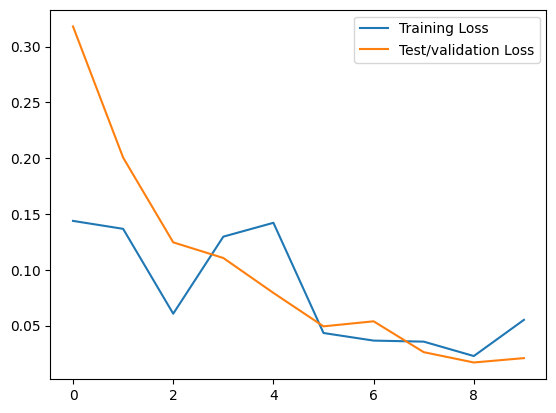

In [ ]:
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test/validation Loss')
plt.legend()

Bisa dilihat, loss pada epoch 8 merupakan loss yang paling rendah.

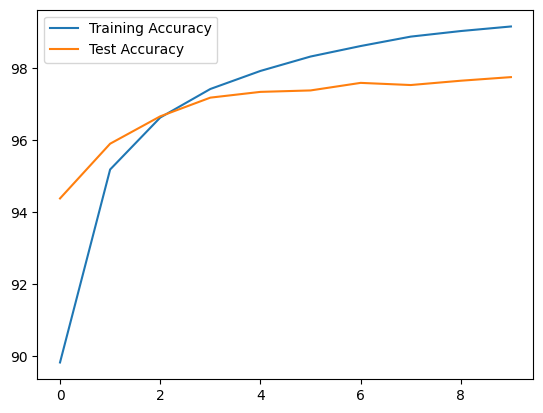

In [ ]:
train_acc = [t/600 for t in train_correct]
test_acc = [t/100 for t in test_correct]

plt.plot(train_acc, label='Training Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.legend()

Nilai accuracy yang didapat cukup baik, hampir menyentuh 100% pada akhir epoch.

In [ ]:
test_load_all = DataLoader(test_dataset, batch_size=10000, shuffle=False)

with torch.no_grad():
  correct = 0

  for X_test, y_test in test_load_all:
    y_val = model(X_test.view(len(X_test),-1))
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

100*correct.item()/len(test_dataset)

97.74

In [ ]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 971,    0,    2,    1,    3,    3,    3,    2,    5,    1],
       [   0, 1120,    0,    0,    0,    0,    2,    4,    0,    2],
       [   1,    3, 1017,    6,    5,    0,    1,   11,    3,    0],
       [   0,    2,    2,  975,    0,    4,    0,    2,    1,    4],
       [   1,    0,    0,    0,  943,    1,    2,    0,    2,    5],
       [   0,    1,    0,    6,    1,  873,    2,    0,    4,    1],
       [   2,    2,    2,    1,   12,    5,  946,    0,    1,    2],
       [   0,    1,    1,    7,    5,    0,    0, 1000,    4,    8],
       [   4,    6,    8,    7,    1,    4,    2,    4,  951,    8],
       [   1,    0,    0,    7,   12,    2,    0,    5,    3,  978]])

Pada confusion matrix ini dapat dilihat bahwasanya, model dapat memprediksi dengan tepat. Hal tersebut bisa dilihat dari accuracy yang didapat sebesar 97,74%.